## Repressors / Activators analysis

In [ ]:
# pip install bioframe

In [ ]:
# pip install pyjaspar

In [1]:
import os,sys
import multiDGD
import numpy as np
import pandas as pd
#import mudata as md
import anndata as ad
import bioframe
from pyjaspar import jaspardb

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

####################################
# flexible parameters
####################################
figure_height = 7
n_cols = 1
n_rows = 1
grid_wspace = 1.5
grid_hspace = 2.5
figure_name = 'fig_template'

####################################
# fixed figure design
####################################
# set up figure and grid
cm = 1/2.54
fig = plt.figure(figsize=(18*cm,figure_height*cm))
gs = gridspec.GridSpec(n_rows,n_cols)
gs.update(wspace = grid_wspace, hspace = grid_hspace)
ax_list = []
# fonts
# general text
text_size = 8
scaling_factor = 3
plt.rcParams.update({'font.size': 4*scaling_factor, 'axes.linewidth': 0.3*scaling_factor,
                     'xtick.major.size': 1.5*scaling_factor, 'xtick.major.width': 0.3*scaling_factor, 'ytick.major.size': 1.5*scaling_factor, 'ytick.major.width': 0.3*scaling_factor})
# grid letters
grid_letter_positions = [-0.1, 0.05]
grid_letter_fontsize = 8
grid_letter_fontfamily = 'sans-serif'
grid_letter_fontweight = 'bold'
point_size = 1
# colors
palette_2colrs = ['palegoldenrod', 'cornflowerblue']
batch_palette = ['palegoldenrod', 'cornflowerblue', 'darkmagenta', 'darkslategray']
palette_3colrs = ["lightgray", "cornflowerblue", "darkmagenta", "darkolivegreen", "firebrick", "midnightblue"]
palette_continuous_1 = "GnBu"
palette_continuous_2 = 'magma_r'
# legend set up
legend_x_dist, legend_y_dist = -0.02, 0.0
handletextpad = 0.1
# scatter plot
point_size = 0.3
alpha = 1
point_linewidth = 0.0
handlesize = 0.5
# line plot
linewidth = 0.5

# set trans for labeling physical distance to the left and up:
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)

# ####################################
# # figure template
# ####################################

# # first subplot
ax_list = []
# ax_list.append(plt.subplot(gs[0,0]))
# ax_list[-1].text(grid_letter_positions[0], 1.+grid_letter_positions[1],
#             'A', transform=ax_list[-1].transAxes + trans,
#             fontsize=grid_letter_fontsize, va='bottom', fontfamily=grid_letter_fontfamily,
#             fontweight=grid_letter_fontweight)
# ###
# # here comes the plotting
# ###
# ax_list[-1].legend(bbox_to_anchor=(1.+legend_x_dist, 1.+legend_y_dist), 
#                    loc='upper left', frameon=False,
#                    handletextpad=handletextpad)

# # save figure
# plt.savefig(figure_name+'.png', dpi=300, bbox_inches='tight')

<Figure size 708.661x275.591 with 0 Axes>

In [3]:
# load some test data
model_dir = '/nfs/team205/ed6/data/bonemarrow_model/'
os.listdir(model_dir)

['TSS_perturb_experiment.NDST2.csv',
 'view?usp=drive_link',
 'TSS_perturb_experiment.LINC01013.csv',
 'TSS_perturb_experiment.PRF1.csv',
 'TSS_perturb_experiment.RGS3.csv',
 'TSS_perturb_experiment.SLAIN2.csv',
 'TSS_perturb_experiment.ADAM23.csv',
 'TSS_perturb_experiment.SCD5.csv',
 'TSS_perturb_experiment.HIVEP1.csv',
 'TSS_perturb_experiment.CAMTA1.csv',
 'TSS_perturb_experiment.RMND1.csv',
 'TSS_perturb_experiment.CLK2.csv',
 'TSS_perturb_experiment.TMEM140.csv',
 'TSS_perturb_experiment.GOLM1.csv',
 'TSS_perturb_experiment.CCDC18.csv',
 'TSS_perturb_experiment.GSAP.csv',
 'TSS_perturb_experiment.NKAIN2.csv',
 'TSS_perturb_experiment.AGPAT5.csv',
 'TSS_perturb_experiment.RBM15B.csv',
 'TSS_perturb_experiment.FHIT.csv',
 'TSS_perturb_experiment.UBAP1.csv',
 'TSS_perturb_experiment.LINC01725.csv',
 'TSS_perturb_experiment.GAPT.csv',
 'TSS_perturb_experiment.CEP135.csv',
 'TSS_perturb_experiment.SNCA.csv',
 'TSS_perturb_experiment.SLC8A1-AS1.csv',
 'TF_perturb_experiment.KLF1.csv',


## Get genomic ranges of peaks

In [ ]:
data = ad.read_h5ad(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.h5ad', backed=True)

def _bioframe_from_strings(pos_list: pd.Series):
    """
    Function to create bioframe compatible table from string of genomic position
    """
    # Chromosome and positions
    chr = pos_list.str.split(':').str.get(0)
    start = pd.Series(pos_list.str.split(':').str.get(1)
                      ).str.split('-').str.get(0)
    end = pd.Series(pos_list.str.split(':').str.get(1)
                    ).str.split('-').str.get(1)

    # Create ranges
    bioframe_df = pd.concat([chr, start, end], axis=1)
    bioframe_df.columns = ['chrom', 'start', 'end']
    bioframe_df.loc[:,['start', 'end']] = bioframe_df.loc[:,['start', 'end']].astype(int)
    return bioframe_df.convert_dtypes()

# Get ranges of all peaks
pos_list = data.var[data.var['feature_types'] == 'ATAC'].index.tolist()
pos_list = pd.Series(pos_list).str.replace("-", ":", 1)
peaks_df = _bioframe_from_strings(pos_list)
peaks_df['name'] = '.'
peaks_df.columns = peaks_df.columns.astype('str')

peaks_df.to_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.peaks.csv')

## Save gene names
gene_names = data.var[data.var['feature_types'] == 'GEX']
gene_names.to_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.gene_names.csv')

In [25]:
peaks_df = pd.read_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.peaks.csv', index_col=0)
gene_names = pd.read_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.gene_names.csv', index_col=0) 

In [5]:
gene_names.index

Index(['AL627309.5', 'LINC01409', 'LINC01128', 'NOC2L', 'KLHL17', 'ISG15',
       'C1orf159', 'SDF4', 'B3GALT6', 'UBE2J2',
       ...
       'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6',
       'MT-CYB', 'AL592183.1', 'AC240274.1'],
      dtype='object', length=13431)

## Get genomic ranges of TF motifs

Using TFs with repressor/activator annotations from [Domke et al. 2020](https://www.science.org/doi/full/10.1126/science.aba7612)

In [289]:
## Read list of repressors/activators
tf_df = pd.read_table(model_dir+'TF_mode_domcke_2020.txt')
tf_df = tf_df[tf_df.Transcription_factor.isin(gene_names.index)].copy()
tf_df

,Transcription_factor,GO_term_mode_of_action
0,GFI1B,Repressor
1,BACH2,Repressor
2,PBX2,Activator
4,ARID5A,Repressor
6,HESX1,Repressor
...,...,...
222,PLAG1,Activator
230,RFX3,Activator
235,CEBPD,Activator
240,SRF,Activator


Using TFs with repressor/activator annotations from Yoshida et al. (in mice immune cells)

In [29]:
# yoshida_tfs = ['Bcl11b',
# 'Pbx1',
# 'Zbtb7b',
# 'Hnf4a',
# 'Sox5',
# 'Hic1',
# 'Arid5a',
# 'Bach2',
# 'Zbtb7a',
# 'Bcl6',
# 'Atf7',
# 'Tef',
# 'Zbtb7c',
# 'Rest',
# 'Cic',
# 'Myog',
# 'Erf',
# 'Zfp187',
# 'Tfdp1',
# 'Gata1',
# 'Nr6a1',
# 'Hsf2',
# 'Runx1',
# 'Nfkb1',
# 'Zfp281',
# 'Spic',
# 'Mybl2',
# 'Klf8',
# 'Gata2',
# 'E2f5',
# 'Nr4a2',
# 'Cdc5l',
# 'Nr1d2',
# 'Stat2',
# 'Tcf7l1',
# 'Cebpe',
# 'Foxj2',
# 'Foxk1',
# 'Rora',
# 'Rel',
# 'Nfic',
# 'Runx3',
# 'Maf',
# 'Egr3',
# 'Hivep1',
# 'Gata3',
# 'Tbp',
# 'Nfix',
# 'Bcl11a',
# 'Rorc',
# 'Nr1d1',
# 'Relb',
# 'Hoxa9',
# 'Nfe2',
# 'Mafg',
# 'Runx2',
# 'Nr2f6',
# 'Irf4',
# 'Tcf12',
# 'Mafb',
# 'Ctcf',
# 'Zeb1',
# 'Egr2',
# 'Tcf3',
# 'Hoxa10',
# 'Nfkb2',
# 'Eomes',
# 'Cebpd',
# 'Mef2c',
# 'Tbx21',
# 'Ebf1',
# 'Lef1',
# 'Cebpb',
# 'Cebpa',
# 'Tcf7',
# 'Pax5']

# yoshida_tfs = [x.upper() for x in yoshida_tfs]

# # Save list of TFs to test
# with open('/nfs/team205/ed6/data/bonemarrow_model/TF_to_test.yoshida.txt', 'w') as f:
#     for tf in [x for x in yoshida_tfs if x in gene_names.index]:
#         f.write(tf+'\n')
        


# tf_df = pd.DataFrame(yoshida_tfs, columns=['Transcription_factor'])
# tf_df['GO_term_mode_of_action'] = 'Activator'
# tf_df.loc[:15,'GO_term_mode_of_action'] = "Repressor"
# tf_df.to_csv(model_dir + 'TF_mode_yoshida_2020.csv')

In [34]:
JASPAR_URL = 'http://expdata.cmmt.ubc.ca/JASPAR/downloads/UCSC_tracks/2022/hg38/'
CHROMS = [str(x) for x in range(1,23)] + ['X', 'Y']
CHROMS = ['chr'+x for x in CHROMS]

jdb_obj = jaspardb(release='JASPAR2022')

def get_TF_matches(args) -> pd.DataFrame:
    '''
    Get TF motif matches for each peak using bioframe
    '''
    peaks_df, tf_name = args
    # Get IDs for TF motifs
    tf_ids = [m.matrix_id for m in jdb_obj.fetch_motifs_by_name(tf_name)]
    if len([t for t in tf_ids if t.startswith("MA")]) == 0:
        raise ValueError(f'No motifs found for TF {tf_name}')
        
    # Load TF motifs ranges
    motifs_df = pd.DataFrame()
    for tf_id in tf_ids:
        if tf_id.startswith('MA'):
            file_url = f'{JASPAR_URL}/{tf_id}.tsv.gz'
            jaspar_df = bioframe.read_table(file_url, schema='jaspar',skiprows=1)
            motifs_df = pd.concat([motifs_df, jaspar_df])

    # Clean up
    motifs_df = motifs_df[motifs_df.chrom.isin(CHROMS)]
    motifs_df = motifs_df[['chrom', 'start', 'end', 'name']].drop_duplicates()
    
    ## Find overlaps
    peaks_motif_counts = bioframe.count_overlaps(peaks_df, motifs_df)
    peaks_motif_counts[f'{tf_name}_motifs'] = peaks_motif_counts['count'].copy()
    peaks_motif_counts[f'{tf_name}_motifs'] = np.where(peaks_motif_counts[tf_name + '_motifs'] > 0, 1, 0)

    return peaks_motif_counts[['chrom', 'start', 'end', 'name', f'{tf_name}_motifs' ]]

In [35]:
from requests.exceptions import HTTPError
import gc

motifs_in_peaks = pd.DataFrame()
n_tfs = tf_df['Transcription_factor'].shape[0]
for i,tf in enumerate(tf_df['Transcription_factor']):
    print(f'TF {i+1}/{n_tfs} - {tf}')
    try:
        peaks_motif_counts = get_TF_matches((peaks_df, tf))[[f'{tf}_motifs']]
    except:
        continue
    motifs_in_peaks = pd.concat([motifs_in_peaks,peaks_motif_counts ], axis=1)
    gc.collect()
    

TF 1/76 - BCL11B
TF 2/76 - PBX1
TF 3/76 - ZBTB7B
TF 4/76 - HNF4A
TF 5/76 - SOX5
TF 6/76 - HIC1
TF 7/76 - ARID5A
TF 8/76 - BACH2
TF 9/76 - ZBTB7A
TF 10/76 - BCL6
TF 11/76 - ATF7
TF 12/76 - TEF
TF 13/76 - ZBTB7C
TF 14/76 - REST
TF 15/76 - CIC
TF 16/76 - MYOG


/nfs/team205/ed6/miniconda3/envs/multiDGD-env/lib/python3.9/site-packages/pyjaspar/__init__.py:754: BiopythonWarning: Zero motifs returned with current select critera
  warnings.warn("Zero motifs returned with current select critera",


TF 17/76 - ERF
TF 18/76 - ZFP187
TF 19/76 - TFDP1


/nfs/team205/ed6/miniconda3/envs/multiDGD-env/lib/python3.9/site-packages/pyjaspar/__init__.py:754: BiopythonWarning: Zero motifs returned with current select critera
  warnings.warn("Zero motifs returned with current select critera",


TF 20/76 - GATA1
TF 21/76 - NR6A1
TF 22/76 - HSF2
TF 23/76 - RUNX1
TF 24/76 - NFKB1
TF 25/76 - ZFP281
TF 26/76 - SPIC


/nfs/team205/ed6/miniconda3/envs/multiDGD-env/lib/python3.9/site-packages/pyjaspar/__init__.py:754: BiopythonWarning: Zero motifs returned with current select critera
  warnings.warn("Zero motifs returned with current select critera",


TF 27/76 - MYBL2
TF 28/76 - KLF8
TF 29/76 - GATA2


/nfs/team205/ed6/miniconda3/envs/multiDGD-env/lib/python3.9/site-packages/pyjaspar/__init__.py:754: BiopythonWarning: Zero motifs returned with current select critera
  warnings.warn("Zero motifs returned with current select critera",


TF 30/76 - E2F5
TF 31/76 - NR4A2


/nfs/team205/ed6/miniconda3/envs/multiDGD-env/lib/python3.9/site-packages/pyjaspar/__init__.py:754: BiopythonWarning: Zero motifs returned with current select critera
  warnings.warn("Zero motifs returned with current select critera",


TF 32/76 - CDC5L
TF 33/76 - NR1D2


/nfs/team205/ed6/miniconda3/envs/multiDGD-env/lib/python3.9/site-packages/pyjaspar/__init__.py:754: BiopythonWarning: Zero motifs returned with current select critera
  warnings.warn("Zero motifs returned with current select critera",


TF 34/76 - STAT2
TF 35/76 - TCF7L1
TF 36/76 - CEBPE
TF 37/76 - FOXJ2
TF 38/76 - FOXK1
TF 39/76 - RORA
TF 40/76 - REL
TF 41/76 - NFIC
TF 42/76 - RUNX3
TF 43/76 - MAF
TF 44/76 - EGR3
TF 45/76 - HIVEP1
TF 46/76 - GATA3


/nfs/team205/ed6/miniconda3/envs/multiDGD-env/lib/python3.9/site-packages/pyjaspar/__init__.py:754: BiopythonWarning: Zero motifs returned with current select critera
  warnings.warn("Zero motifs returned with current select critera",


TF 47/76 - TBP
TF 48/76 - NFIX
TF 49/76 - BCL11A
TF 50/76 - RORC


/nfs/team205/ed6/miniconda3/envs/multiDGD-env/lib/python3.9/site-packages/pyjaspar/__init__.py:754: BiopythonWarning: Zero motifs returned with current select critera
  warnings.warn("Zero motifs returned with current select critera",


TF 51/76 - NR1D1
TF 52/76 - RELB
TF 53/76 - HOXA9
TF 54/76 - NFE2
TF 55/76 - MAFG
TF 56/76 - RUNX2
TF 57/76 - NR2F6
TF 58/76 - IRF4
TF 59/76 - TCF12
TF 60/76 - MAFB
TF 61/76 - CTCF
TF 62/76 - ZEB1
TF 63/76 - EGR2
TF 64/76 - TCF3
TF 65/76 - HOXA10
TF 66/76 - NFKB2
TF 67/76 - EOMES
TF 68/76 - CEBPD
TF 69/76 - MEF2C
TF 70/76 - TBX21
TF 71/76 - EBF1
TF 72/76 - LEF1
TF 73/76 - CEBPB
TF 74/76 - CEBPA
TF 75/76 - TCF7
TF 76/76 - PAX5


In [36]:
print('ciaone')

ciaone


In [38]:
motifs_in_peaks.index = peaks_df[['chrom', 'start', 'end']].astype(str).apply(lambda x: "-".join(x), axis=1)
# motifs_in_peaks.to_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.motifs_in_peaks.csv')
motifs_in_peaks.to_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.yoshida_motifs_in_peaks.csv')

In [94]:
motifs_in_peaks = pd.read_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.motifs_in_peaks.csv', index_col=0)
motifs_in_peaks.columns = motifs_in_peaks.columns.str.replace("_motifs", '')

---

In [63]:
## Exclude peaks with binding sites for less than 50% of the TFs 
motifs_in_peaks_clean = motifs_in_peaks[(motifs_in_peaks.sum(1) > 20) & (motifs_in_peaks.sum(1) < 50)]
motifs_in_peaks_clean = motifs_in_peaks_clean.loc[:,motifs_in_peaks_clean.columns.isin(gene_names.index)].copy()

In [64]:
# motifs_in_peaks_clean.to_csv('/nfs/team205/ed6/data/bonemarrow_model/GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.yoshida_motifs_in_peaks.clean.csv')
motifs_in_peaks_clean.to_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.motifs_in_peaks.clean.csv')

In [95]:
motifs_in_peaks_clean = pd.read_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.motifs_in_peaks.clean.csv')

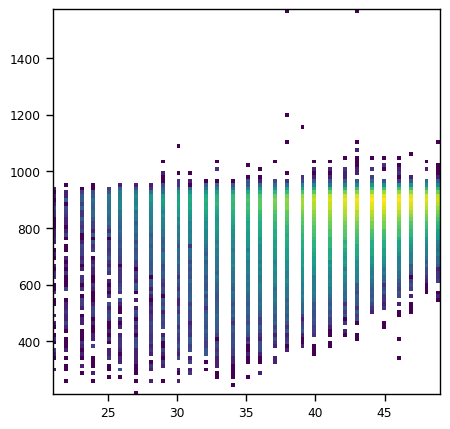

In [65]:
peaks_df['size'] = peaks_df['end'] - peaks_df['start']
peaks_df['n_motifs_in_peak'] = motifs_in_peaks.sum(1).values
peaks_df.index = motifs_in_peaks.index

plt.rcParams['figure.figsize'] = [5,5]
plt.hist2d(peaks_df.loc[motifs_in_peaks_clean.index].n_motifs_in_peak, peaks_df.loc[motifs_in_peaks_clean.index]['size'], bins=100, norm=matplotlib.colors.LogNorm());

## Perturb TF expression

In [67]:
tf_df = tf_df[tf_df.Transcription_factor.isin(motifs_in_peaks_clean.columns)]
# Save list of TFs to test
with open('/nfs/team205/ed6/data/bonemarrow_model/TF_to_test.yoshida.txt', 'w') as f:
    for tf in tf_df['Transcription_factor'].tolist():
        f.write(tf+'\n')

Run on cluster

Try without GPU

In [68]:
model_dir = '/nfs/team205/ed6/data/bonemarrow_model/'

# Read data
data = ad.read_h5ad(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.h5ad')

In [69]:
# # Check that TF is in data
# if not tf_name in data.var_names:
#     raise ValueError(f'Expression of {tf_name} not found')

# Load trained model
model = multiDGD.DGD.load(data=data, save_dir=model_dir, model_name='dgd_bonemarrow_default_trained_and_tested')

# specify the samples we want to look at
testset = data[data.obs["train_val_test"] == "test",:].copy()

Covariate model initialized as:

        Gaussian_mix_compture:
            Dimensionality: 2
            Number of components: 4
        
#######################
Training status
#######################
True


In [70]:
testset

AnnData object with n_obs × n_vars = 6925 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'train_val_test', 'observable', 'covariate_Site'
    var: 'feature_types', 'gene_id', 'modality'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'

In [192]:
def run_TF_perturbation(tf_name):
    predicted_changes, samples_of_interest = model.gene2peak(gene_name=tf_name, testset=testset)
    delta_atac = predicted_changes[1]

    atac_delta_adata = ad.AnnData(X = delta_atac.numpy(), obs = testset[samples_of_interest].obs, var=var_atac)

#     # Get output
#     TF_binding_peaks = motifs_in_peaks_clean.index[motifs_in_peaks_clean[tf_name] == 1]
#     random_peaks = motifs_in_peaks_clean.sample(int(motifs_in_peaks_clean[tf_name].sum())).index

#     perturb_res_df = pd.DataFrame({
#         'mean_delta_TFmotifs':atac_delta_adata[:,TF_binding_peaks].X.mean(1).toarray(),
#         'mean_delta_random':atac_delta_adata[:,random_peaks].X.mean(1).toarray(),
#         'frac_closing_TFmotifs':get_closing_fraction(atac_delta_adata[:,TF_binding_peaks].X),
#         'frac_closing_random':get_closing_fraction(atac_delta_adata[:,random_peaks].X)
#         }
#         )
#     perturb_res_df['TF_name'] = tf_name
#     # perturb_res_df['TF_mode'] = tf_df[tf_df['Transcription_factor'] == tf_name].GO_term_mode_of_action.values[0]
#     perturb_res_df.to_csv(model_dir + f'TF_perturb_experiment.{tf_name}.csv')
    return(atac_delta_adata)

In [626]:
var_gex = data.var[data.var['modality'] == 'GEX']
var_atac = data.var[data.var['modality'] == 'ATAC']
atac_delta_adata = run_TF_perturbation('MAFG')

using 311 samples


In [658]:
# TF_binding_peaks = motifs_in_peaks_clean.index[motifs_in_peaks_clean['ZBTB7A'] == 1]
# random_peaks = motifs_in_peaks_clean.sample(int(motifs_in_peaks_clean['ZBTB7A'].sum())).index

n_sample = 10000
TF_binding_peaks = motifs_in_peaks_clean.index[motifs_in_peaks_clean['MAFG'] == 1]
TF_binding_peaks = np.random.choice(TF_binding_peaks.values.flatten(), n_sample)
random_peaks = motifs_in_peaks_clean[motifs_in_peaks_clean['MAFG'] != 1].sample(n_sample).index

29116


In [632]:
perturb_res_df = pd.DataFrame({
        'mean_delta_TFmotifs':atac_delta_adata[:,TF_binding_peaks].X.mean(1).toarray(),
        'mean_delta_random':atac_delta_adata[:,random_peaks].X.mean(1).toarray(),
        # 'frac_closing_TFmotifs':get_closing_fraction(atac_delta_adata[:,TF_binding_peaks].X),
        # 'frac_closing_random':get_closing_fraction(atac_delta_adata[:,random_peaks].X)
        }
        )
perturb_res_df['TF_name'] = 'MAFG'
perturb_res_df['TF_mode'] = tf_df[tf_df['Transcription_factor'] == 'MAFG'].GO_term_mode_of_action.values[0]


In [409]:
# atac_delta_adata.X = (atac_delta_adata.X.T - atac_delta_adata.X.mean(1) / atac_delta_adata.X.std(1)).T

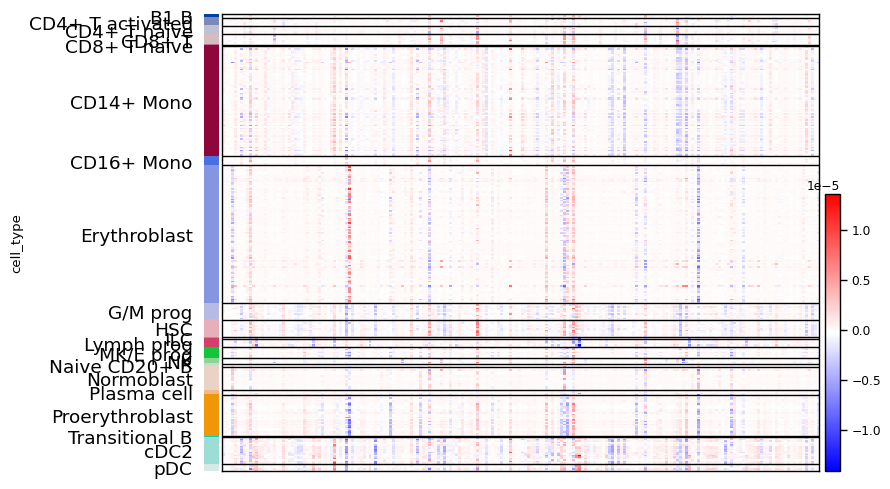

In [633]:
sc.pl.heatmap(atac_delta_adata, TF_binding_peaks[0:200], groupby='cell_type', cmap='bwr')

In [634]:
def get_closing_fraction(perturb_mat, qs=None):
    if qs is None:
        closing_fraction = np.mean(np.sign(perturb_mat) < 0, 1).toarray()
    # else:
        
    return(closing_fraction)

In [640]:
qs[1]

8.491442713420838e-07

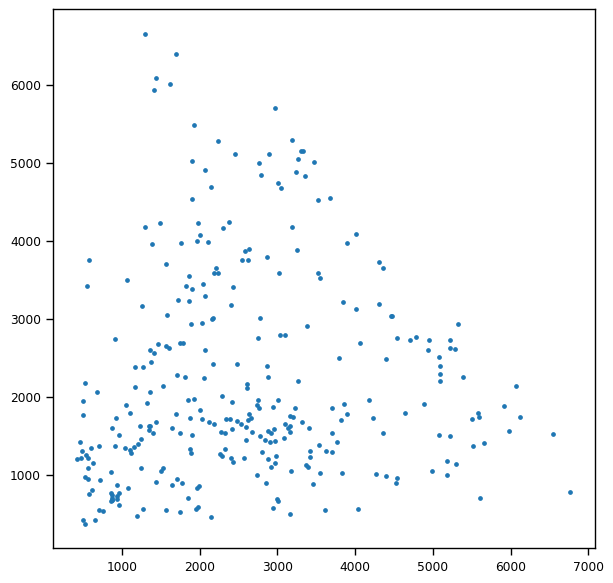

In [650]:
plt.rcParams['figure.figsize'] = [7,7]
qs = np.quantile(atac_delta_adata[:,random_peaks].X.flatten(), [0.25, 0.75])
perturb_mat = atac_delta_adata[:,TF_binding_peaks].X.toarray()
plt.plot(np.sum(perturb_mat < qs[0], 1), np.sum(perturb_mat > qs[1], 1), '.')

In [651]:
perturb_mat = atac_delta_adata[:,random_peaks].X.toarray()
closing_fraction_random = np.mean(perturb_mat < qs[0], 1)
opening_fraction_random = np.mean(perturb_mat > qs[1], 1)
mean_delta_random = perturb_mat.mean(1)
closing_fraction_ratio_random = np.sum(perturb_mat < qs[0], 1)/np.sum(perturb_mat > qs[1], 1)

perturb_mat = atac_delta_adata[:,TF_binding_peaks].X.toarray()
closing_fraction_tfmotif = np.mean(perturb_mat < qs[0], 1)
opening_fraction_tfmotif = np.mean(perturb_mat > qs[1], 1)
mean_delta_tfmotif = perturb_mat.mean(1)
closing_fraction_ratio_tfmotif = np.sum(perturb_mat < qs[0], 1)/np.sum(perturb_mat > qs[1], 1)

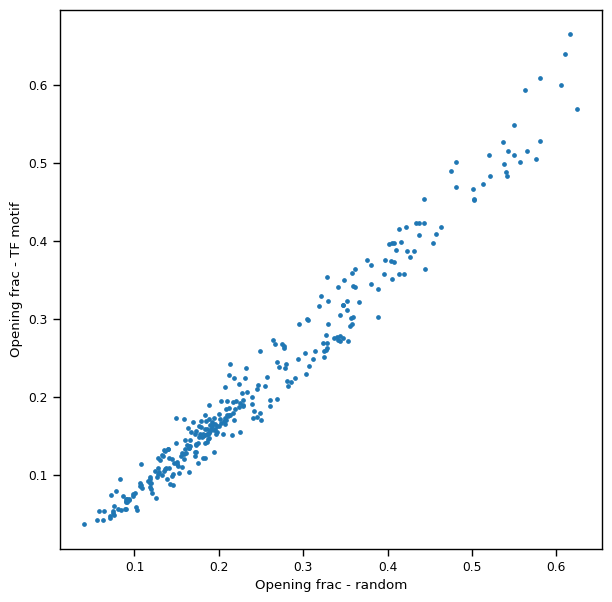

In [652]:
plt.plot(opening_fraction_random, opening_fraction_tfmotif, '.');
plt.xlabel("Opening frac - random");
plt.ylabel("Opening frac - TF motif");
# plt.axline((min(opening_fraction_random), min(opening_fraction_tfmotif)), slope=1, color="grey", linestyle=':')
plt.show()

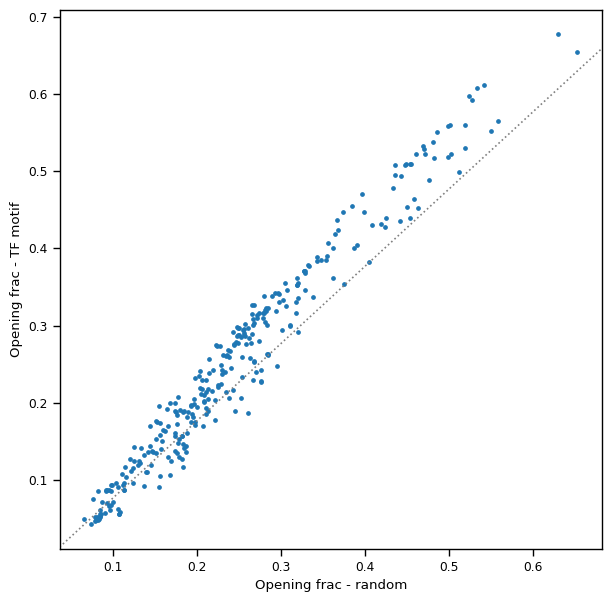

In [653]:
plt.plot(closing_fraction_random, closing_fraction_tfmotif, '.');
plt.xlabel("Opening frac - random");
plt.ylabel("Opening frac - TF motif");
plt.axline((min(closing_fraction_random), min(closing_fraction_tfmotif)), slope=1, color="grey", linestyle=':')
plt.show()

In [655]:
atac_delta_adata.obs['op_frac_TFmotif'] = opening_fraction_tfmotif

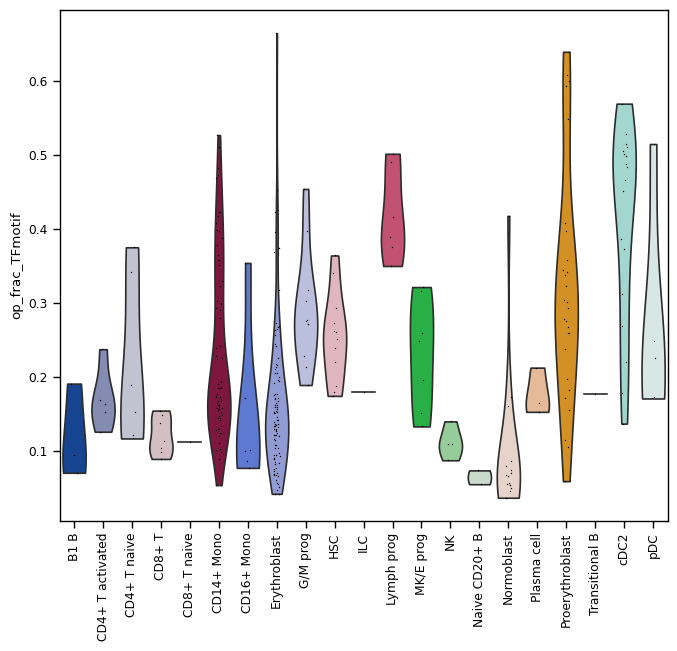

In [657]:
sc.pl.violin(atac_delta_adata, 'op_frac_TFmotif', groupby='cell_type', rotation=90)

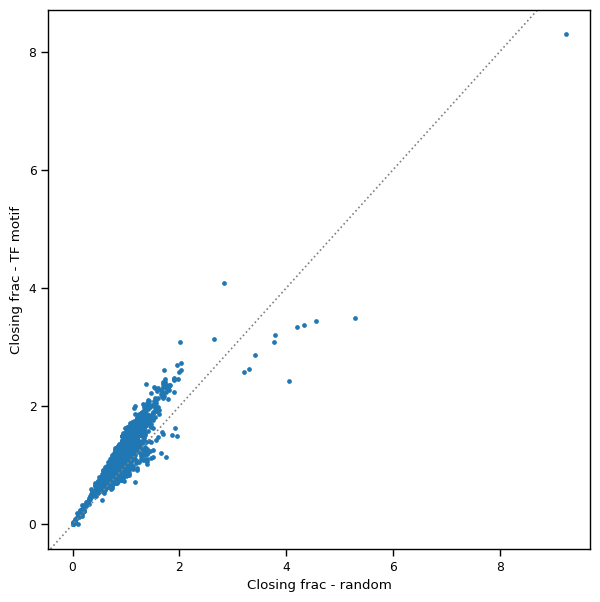

In [348]:

plt.plot(closing_fraction_ratio_random, closing_fraction_ratio_tfmotif, '.');
plt.xlabel("Closing frac - random");
plt.ylabel("Closing frac - TF motif");
plt.axline((min(mean_delta_random), min(mean_delta_tfmotif)), slope=1, color="grey", linestyle=':')
plt.show()

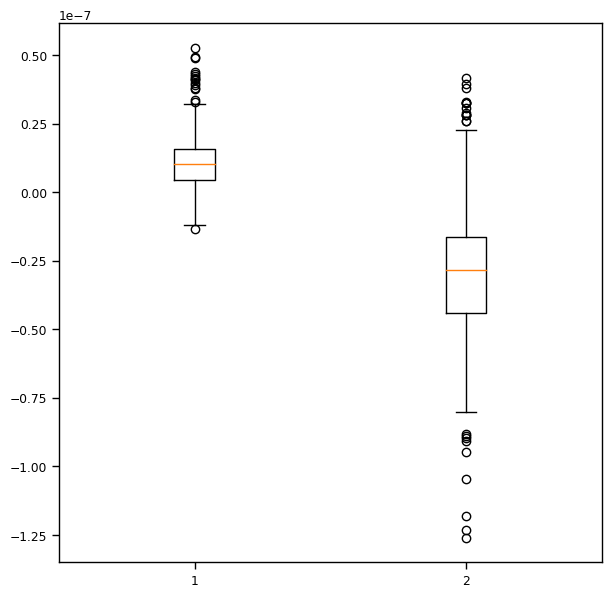

In [439]:
plt.boxplot([mean_delta_random, mean_delta_tfmotif]);

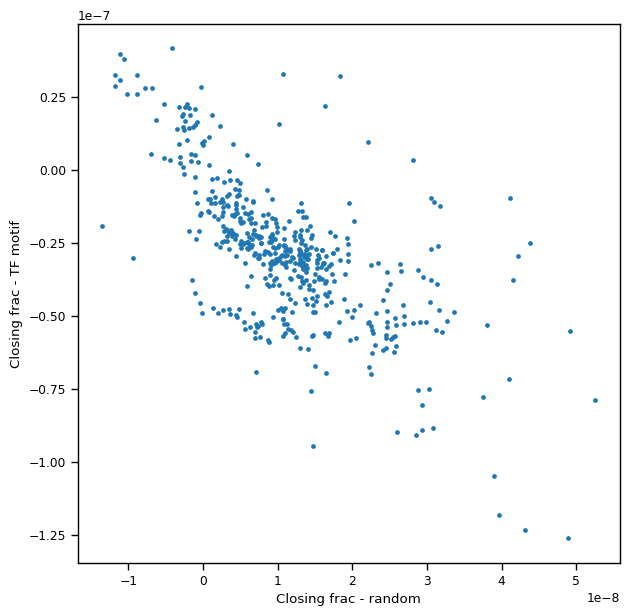

In [441]:
plt.plot(mean_delta_random, mean_delta_tfmotif, '.');
plt.xlabel("Closing frac - random");
plt.ylabel("Closing frac - TF motif");
# plt.axvline(0, color="grey", linestyle=':')
# plt.axhline(0, color="grey", linestyle=':')
plt.show()

<Axes: xlabel='mean_delta_random', ylabel='TF_name'>

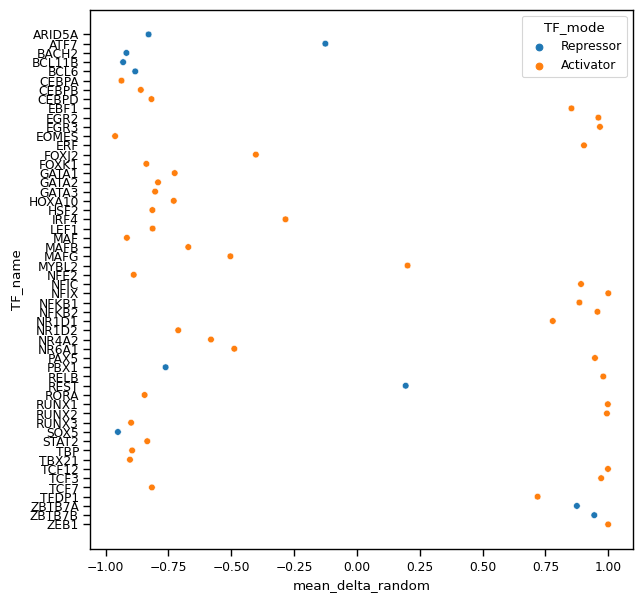

In [461]:

corr_df = pd.merge(all_perturb_df, n_cells_df).groupby(['TF_name', 'TF_mode', "N_cells"])[['mean_delta_TFmotifs','mean_delta_random']].corr().iloc[0::2,-1].reset_index()
sns.scatterplot(data=corr_df, x='mean_delta_random', y='TF_name', hue='TF_mode')

<Axes: xlabel='mean_delta_random', ylabel='N_cells'>

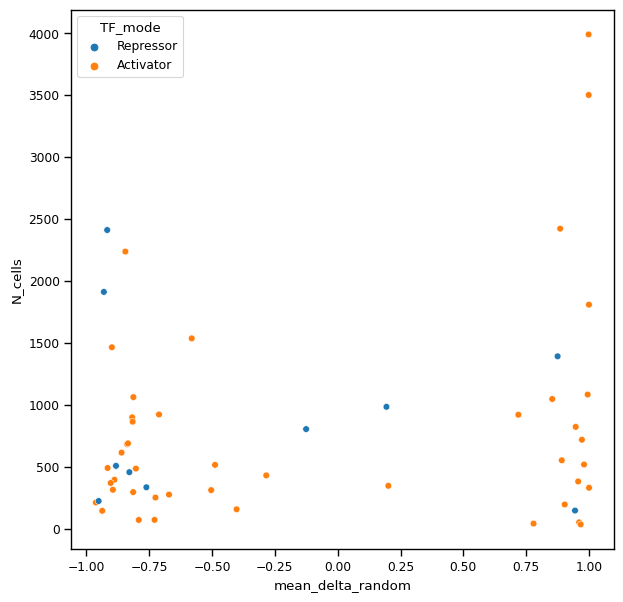

In [462]:
sns.scatterplot(data=corr_df, x='mean_delta_random', y='N_cells', hue='TF_mode')

In [213]:
perturb_res_df['cell_type'] = atac_delta_adata.obs['cell_type'].values.copy()

<Axes: xlabel='mean_delta_TFmotifs', ylabel='cell_type'>

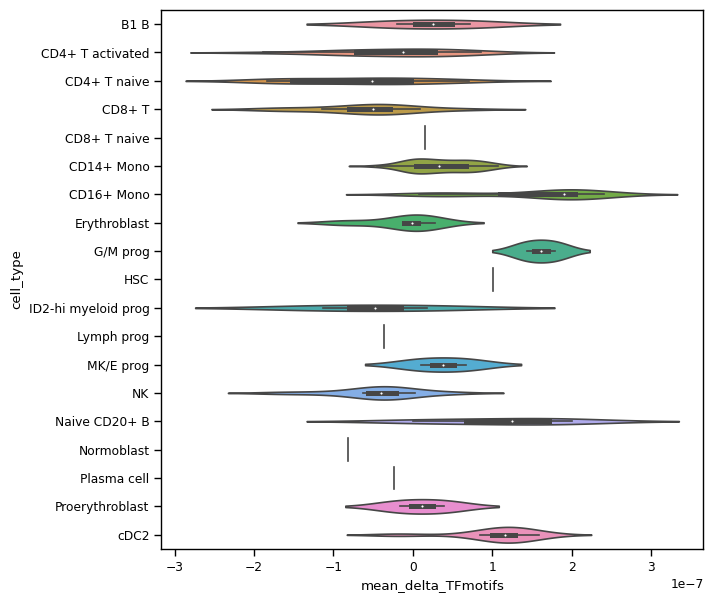

In [219]:
sns.violinplot(data=perturb_res_df, x='mean_delta_TFmotifs', y='cell_type')
# sns.violinplot(data=perturb_res_df, x='mean_delta_random', y='cell_type')

In [9]:
# var_gex = data.var[data.var['modality'] == 'GEX']
# var_atac = data.var[data.var['modality'] == 'ATAC']

# import multiprocessing
# def run_TF_perturbation(tf_name):
#     predicted_changes, samples_of_interest = model.gene2peak(gene_name=tf_name, testset=testset)
#     delta_atac = predicted_changes[1]

#     atac_delta_adata = ad.AnnData(X = delta_atac.numpy(), obs = testset[samples_of_interest].obs, var=var_atac)

#     # Get output
#     TF_binding_peaks = motifs_in_peaks_clean.index[motifs_in_peaks_clean[tf_name] == 1]
#     random_peaks = motifs_in_peaks_clean.sample(int(motifs_in_peaks_clean[tf_name].sum())).index

#     perturb_res_df = pd.DataFrame({
#         'mean_delta_TFmotifs':atac_delta_adata[:,TF_binding_peaks].X.mean(1).toarray(),
#         'mean_delta_random':atac_delta_adata[:,random_peaks].X.mean(1).toarray(),
#         'frac_closing_TFmotifs':get_closing_fraction(atac_delta_adata[:,TF_binding_peaks].X),
#         'frac_closing_random':get_closing_fraction(atac_delta_adata[:,random_peaks].X)
#         }
#         )
#     perturb_res_df['TF_name'] = tf_name
#     perturb_res_df['TF_mode'] = tf_df[tf_df['Transcription_factor'] == tf_name].GO_term_mode_of_action.values[0]
#     perturb_res_df.to_csv(model_dir + f'TF_perturb_experiment.{tf_name}.csv')

# pool = multiprocessing.Pool(processes=5)
# pool.map(run_TF_perturbation, all_tfs[0:20])

# np.random.seed(120)
# sampled_tf_df = tf_df.groupby('GO_term_mode_of_action').apply(lambda x: x.sample(10))

# def get_closing_fraction(perturb_mat):
#     closing_fraction = np.mean(np.sign(perturb_mat) < 0, 1).toarray()
#     return(closing_fraction)

# # for tf_name in tf_df['Transcription_factor']:
# def run_TF_perturbation(tf_name):
#     predicted_changes, samples_of_interest = model.gene2peak(gene_name=tf_name, testset=testset)
#     delta_gex = predicted_changes[0]
#     delta_atac = predicted_changes[1]

#     atac_delta_adata = ad.AnnData(X = delta_atac.numpy(), obs = testset[samples_of_interest].obs, var=var_atac)

#     # Get output
#     TF_binding_peaks = motifs_in_peaks_clean.index[motifs_in_peaks_clean[tf_name] == 1]
#     random_peaks = motifs_in_peaks_clean.sample(int(motifs_in_peaks_clean[tf_name].sum())).index

#     perturb_res_df = pd.DataFrame({
#         'mean_delta_TFmotifs':atac_delta_adata[:,TF_binding_peaks].X.mean(1).toarray(),
#         'mean_delta_random':atac_delta_adata[:,random_peaks].X.mean(1).toarray(),
#         'frac_closing_TFmotifs':get_closing_fraction(atac_delta_adata[:,TF_binding_peaks].X),
#         'frac_closing_random':get_closing_fraction(atac_delta_adata[:,random_peaks].X)
#         })
#     perturb_res_df['TF_name'] = tf_name
#     perturb_res_df['TF_mode'] = tf_df[tf_df.Transcription_factor == tf_name].GO_term_mode_of_action.values[0]
#     perturb_res_df.to_csv(model_dir + f'TF_perturb_experiment.{tf_name}.csv')

# pool = multiprocessing.Pool(processes=num_processes)
# pool.map(process_item, items)

### Parse results

In [4]:
model_dir = '/nfs/team205/ed6/data/bonemarrow_model/'

In [384]:
out_files = [x for x in os.listdir(model_dir) if x.startswith('TF_perturb_experiment.')]
all_perturb_df = pd.concat([pd.read_csv(model_dir+ f, index_col=0) for f in out_files])

all_perturb_df = all_perturb_df[all_perturb_df['TF_name'].isin(tf_df.Transcription_factor)].copy()
all_perturb_df = all_perturb_df.drop('TF_mode', axis=1)
all_perturb_df = pd.merge(all_perturb_df, tf_df.rename({"Transcription_factor":"TF_name", 'GO_term_mode_of_action':'TF_mode'}, axis=1),
        how='left'
        )

In [356]:
all_perturb_df.to_csv(model_dir + 'all_TF_perturb_experiment_output.csv')

In [5]:
all_perturb_df = pd.read_csv(model_dir + 'all_TF_perturb_experiment_output.csv', index_col=0)

In [6]:
long_perturb_df = all_perturb_df.melt(id_vars = ['TF_name', 'TF_mode', 'cell_type'], var_name='metric', value_name='value')
long_perturb_df['peak_set'] = np.where(long_perturb_df.metric.str.contains('_random'), 'random', 'TF_binding')
long_perturb_df['metric_type'] = np.where(
    long_perturb_df.metric.str.contains('frac_closing'), 'frac_closing', 
    np.where(long_perturb_df.metric.str.contains('frac_opening'), 'frac_opening',  'mean_delta'))

In [7]:
motifs_in_peaks_clean = pd.read_csv(model_dir + 'GSE194122_openproblems_neurips2021_multiome_BMMC_processed_withDataSplit.motifs_in_peaks.clean.csv', index_col=0)

In [8]:
## Add number of peaks with motif
n_peaks_df = motifs_in_peaks_clean.sum(0).reset_index()
n_peaks_df.columns = ['TF_name', 'N_peaks']
long_perturb_df = pd.merge(long_perturb_df, n_peaks_df, how='left')

## Add number of perturbed cells
n_cells_df = all_perturb_df['TF_name'].value_counts().reset_index()
n_cells_df.columns = ['TF_name', 'N_cells']
long_perturb_df = pd.merge(long_perturb_df, n_cells_df, how='left')

In [9]:
long_perturb_df['TF_name'].nunique()

108

### Check expression of TFs

In [296]:
import scanpy as sc

In [482]:
gex_adata = testset[:,testset.var['feature_types'] == 'GEX'].copy()
sc.pp.normalize_total(gex_adata)
sc.pp.log1p(gex_adata)

sc.pp.calculate_qc_metrics(gex_adata, inplace=True)
sc.pp.highly_variable_genes(gex_adata)

In [483]:
sc.tl.dendrogram(gex_adata, use_rep='GEX_X_pca', groupby='cell_type')

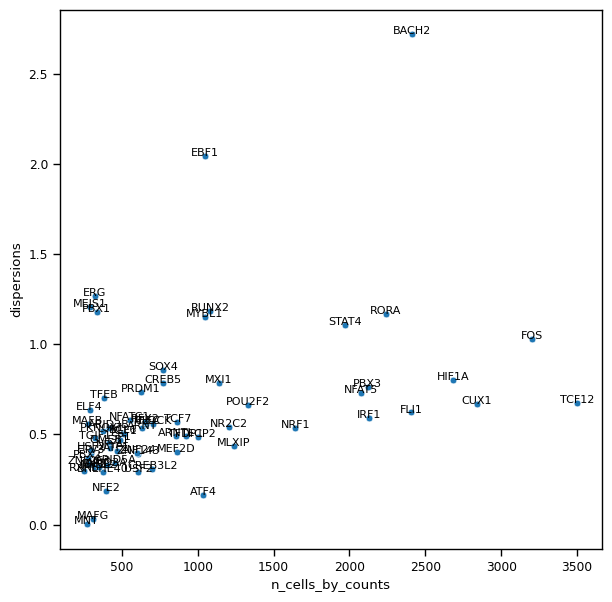

In [1065]:
plt.rcParams['figure.figsize'] = [7,7]
df = gex_adata[:,gex_adata.var['tested_TF']].var.copy()
df['gene_name'] = df.index

# Create the scatter plot
sns.scatterplot(data=df, x='n_cells_by_counts', y='dispersions')

# Add labels to specific data points
labels = df['gene_name']
points = df[['n_cells_by_counts', 'dispersions']].values

for label, point in zip(labels, points):
    plt.text(point[0], point[1], label, fontsize=8, ha='center')

/nfs/team205/ed6/miniconda3/envs/multiDGD-env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


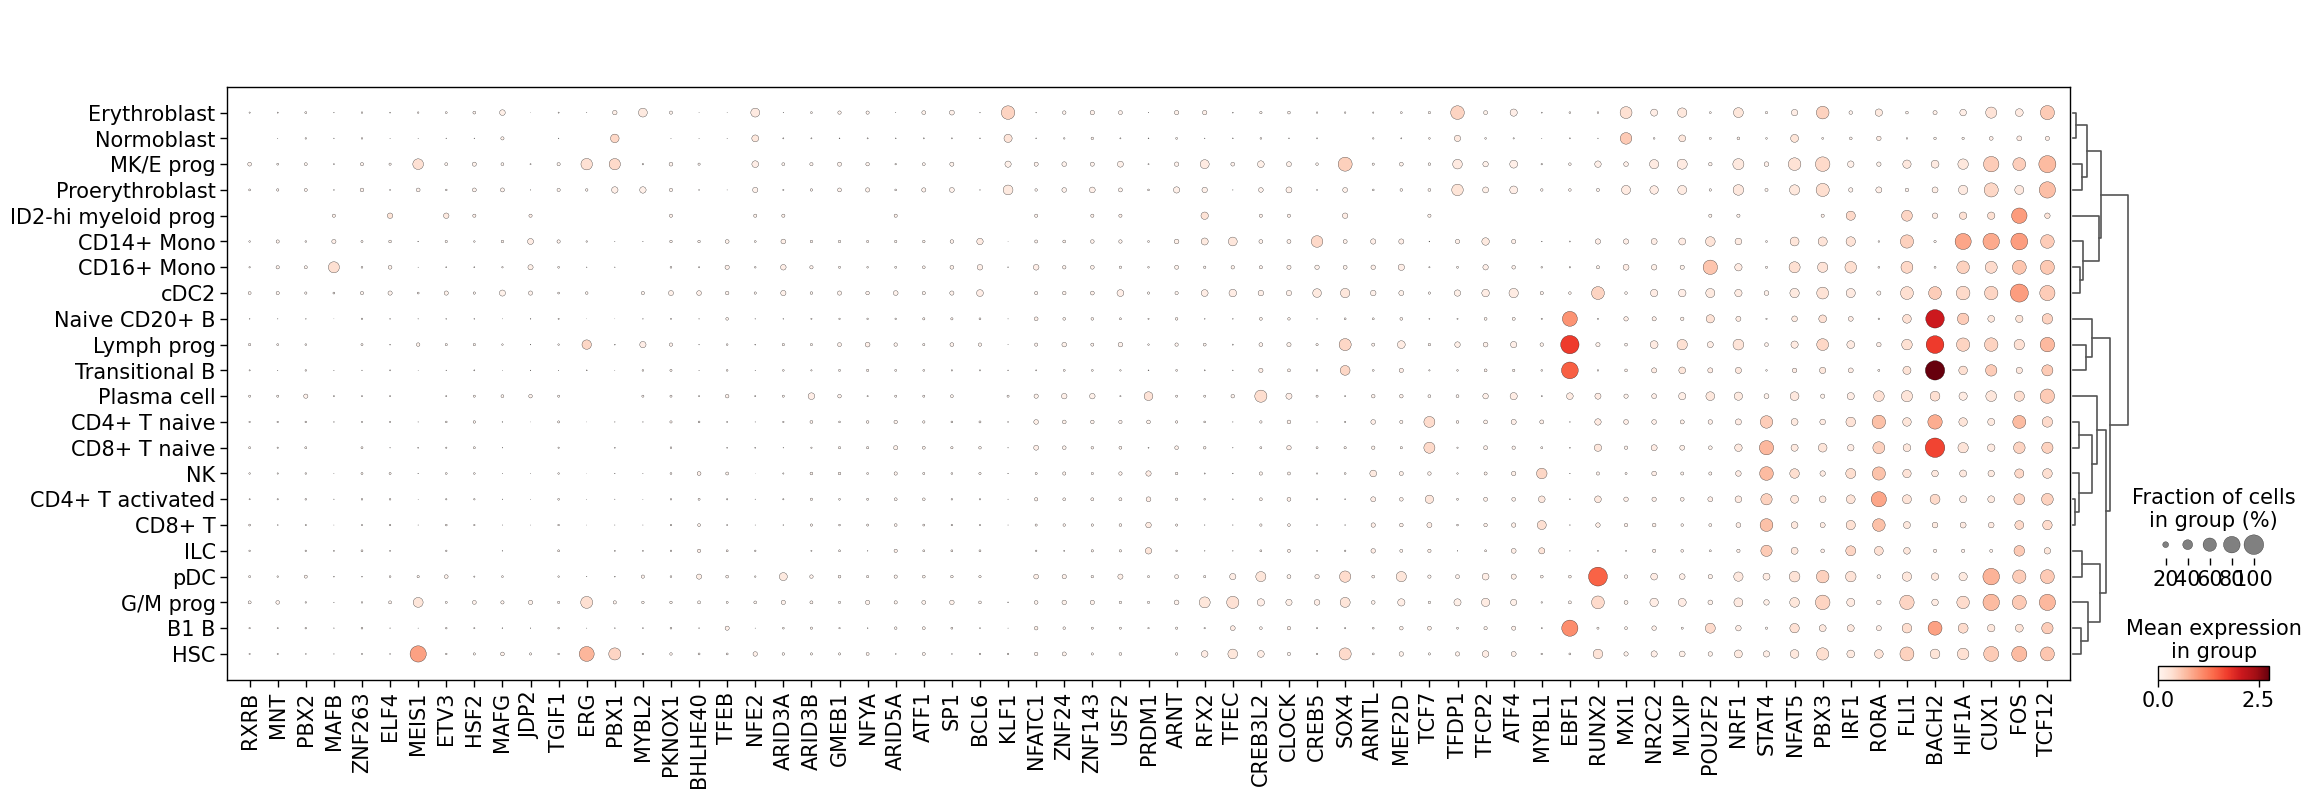

In [1066]:
sc.pl.dotplot(gex_adata, gex_adata[:,gex_adata.var['tested_TF']].var['n_cells_by_counts'].sort_values().index, groupby='cell_type', dendrogram=True)
# sc.pl.dotplot(gex_adata, not_var_tfs, groupby='cell_type', dendrogram=True)

In [1067]:
# # Less than 300 cells expressing gene
# exclude_tfs = gex_adata[:,gex_adata.var['tested_TF']].var['n_cells_by_counts'].sort_values()[0:9].index

### Plot effect of perturbation

In [300]:
# def plot_ecdf(data, xlabel='Data', ylabel='ECDF', label='TF binding', **kwargs):
#     # Sort the data in ascending order
#     sorted_data = np.sort(data)

#     # Calculate the cumulative probabilities
#     cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

#     # Plot the ECDF
#     plt.plot(sorted_data, cumulative_prob, marker='.', linestyle='none', label=label, **kwargs)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

In [10]:
long_perturb_df = long_perturb_df[long_perturb_df['N_cells'] > 250].copy()
long_perturb_df = long_perturb_df[long_perturb_df['N_peaks'] < 80000].copy()

In [11]:
long_perturb_df[['TF_mode', 'TF_name']].drop_duplicates().value_counts('TF_mode')

TF_mode
Activator    34
Repressor     7
Name: count, dtype: int64

In [15]:
peakset_palette = {'TF_binding':palette_3colrs[4], 'random':'grey'}
mode_palette = {
    'Activator':sns.palettes.color_palette("Set1", 2)[0],
    'Repressor':sns.palettes.color_palette("Set1", 2)[1],
}

### Prepare for plotting ###
pl_df = long_perturb_df[(long_perturb_df['metric_type'] == 'mean_delta')].copy()
# Sort TFs by mean value and repressors/activators
mean_df = pl_df.groupby(['TF_name', 'TF_mode', 'peak_set', 'N_cells'])['value'].mean().reset_index()
df1 = mean_df.pivot(index=['TF_name', 'TF_mode'], columns='peak_set', values='value')
sorted_tfs = df1.reset_index().sort_values(['TF_binding'])['TF_name'].values
mean_df['TF_name'] = mean_df['TF_name'].astype('category').cat.reorder_categories(sorted_tfs)
pl_df['TF_name'] = pl_df['TF_name'].astype('category').cat.reorder_categories(sorted_tfs)

n_activators = pl_df[['TF_name',"TF_mode"]].drop_duplicates().value_counts('TF_mode').loc['Activator']
n_repressors = pl_df[['TF_name',"TF_mode"]].drop_duplicates().value_counts('TF_mode').loc['Repressor']

# general text
text_size = 8
scaling_factor = 3
plt.rcParams.update({'font.size': 4*scaling_factor, 'axes.linewidth': 0.3*scaling_factor,
                     'xtick.major.size': 1.5*scaling_factor, 'xtick.major.width': 0.3*scaling_factor, 'ytick.major.size': 1.5*scaling_factor, 'ytick.major.width': 0.3*scaling_factor})

In [16]:
from scipy.stats import ttest_ind, ks_2samp
pl_df['ttest_stat'] = np.nan
pl_df['ttest_pval'] = np.nan

for tf in pl_df.TF_name.unique():
    ttest_res_tf = ttest_ind(
        pl_df[(pl_df['TF_name'] == tf) & (pl_df['peak_set'] == 'random')].value,
        pl_df[(pl_df['TF_name'] == tf) & (pl_df['peak_set'] == 'TF_binding')].value
    )
    pl_df['ttest_stat'] = np.where(pl_df.TF_name == tf, ttest_res_tf.statistic, pl_df['ttest_pval'])
    pl_df['ttest_pval'] = np.where(pl_df.TF_name == tf, ttest_res_tf.pvalue, pl_df['ttest_pval'])
    

In [50]:
pl_df.loc[pl_df['TF_name'] == tf, 'TF_mode'].unique()[0] == 'Repressor'

True

In [51]:
mode_markers[pl_df.loc[pl_df['TF_name'] == tf, 'TF_mode'].unique()[0]] 

'v'

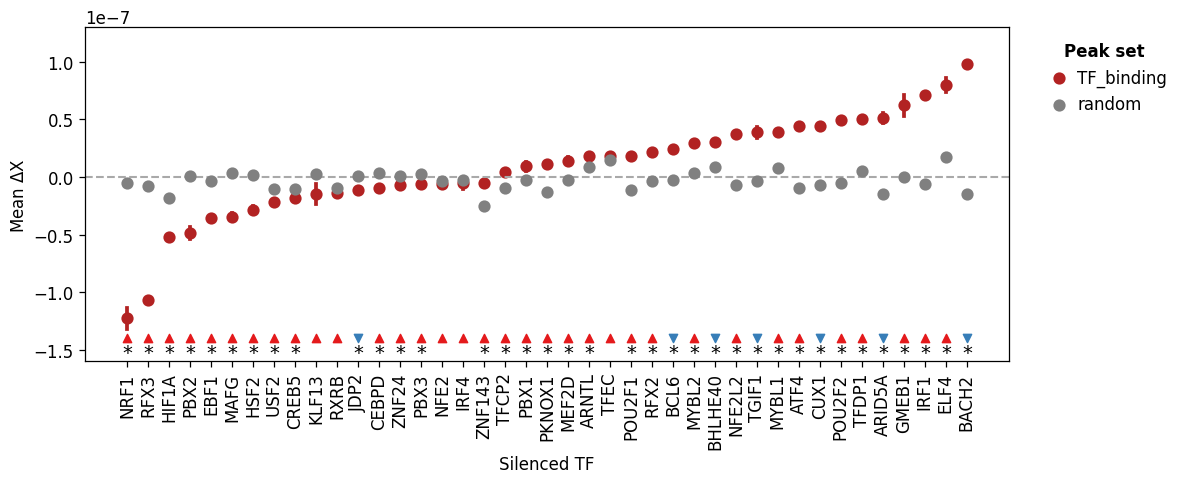

In [53]:
plt.rcParams['figure.figsize'] = [12,5]
n_rows=2
n_cols=1
gs = gridspec.GridSpec(n_rows,n_cols)
gs.update(wspace = grid_wspace, hspace = grid_hspace)

mode_markers = {'Activator':"^", 'Repressor':'v'}
# plt.axvspan(-0.5, n_activators - 0.5, facecolor=mode_palette['Activator'], alpha=0.1)
# plt.axvspan(n_activators - 0.5, n_activators + n_repressors + 0.5, facecolor=mode_palette['Repressor'], alpha=0.1)
plt.axhline(0, color='darkgrey', linestyle='--');
sns.pointplot(data=pl_df, x='TF_name', y='value', hue='peak_set', 
              errorbar='se',
              palette=[peakset_palette['TF_binding'], peakset_palette['random']], join=False)
# sns.scatterplot(data=pl_df, x='TF_name', y='value', hue='peak_set', 
#               errorbar='se',
#               palette=[peakset_palette['TF_binding'], peakset_palette['random']], join=False)
plt.xticks(rotation=90, va='top')
# plt.text(y=1.2e-7, x=n_activators/2, s='Activators\nGO terms', rotation=0, ha='center',va='top', size=14)
# plt.text(y=1.2e-7, x=n_activators + (n_repressors/2) -1, s='Repressor\nGO terms', rotation=0,ha='center', va='top', size=14)

for i,tf in enumerate(pl_df.TF_name.cat.categories): 
    if pl_df[pl_df.TF_name == tf].ttest_pval.unique() < 0.01:
        plt.text(y=- 1.52e-7, x=i, s='*',ha='center', va='center', size=14, rotation=0)
    plt.scatter(y=- 1.40e-7, x=i, marker=mode_markers[pl_df.loc[pl_df['TF_name'] == tf, 'TF_mode'].unique()[0]], 
                color=mode_palette[pl_df.loc[pl_df['TF_name'] == tf, 'TF_mode'].unique()[0]])
plt.ylim(- 1.60e-7, 1.3e-7);

leg = plt.legend(bbox_to_anchor=(1.- legend_x_dist, 1.+legend_y_dist), 
                   loc='upper left', frameon=False, title='Peak set',
                   handletextpad=handletextpad)
leg.get_title().set_fontweight('bold');
plt.xlabel("Silenced TF");
plt.ylabel("Mean $\Delta$X".format());
plt.tight_layout()
plt.savefig('/home/jovyan/mount/gdrive/DGD_multiomics/plot_outputs/TF_perturbation_delta.pdf')

/home/jovyan/my-conda-envs/multiDGD-env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


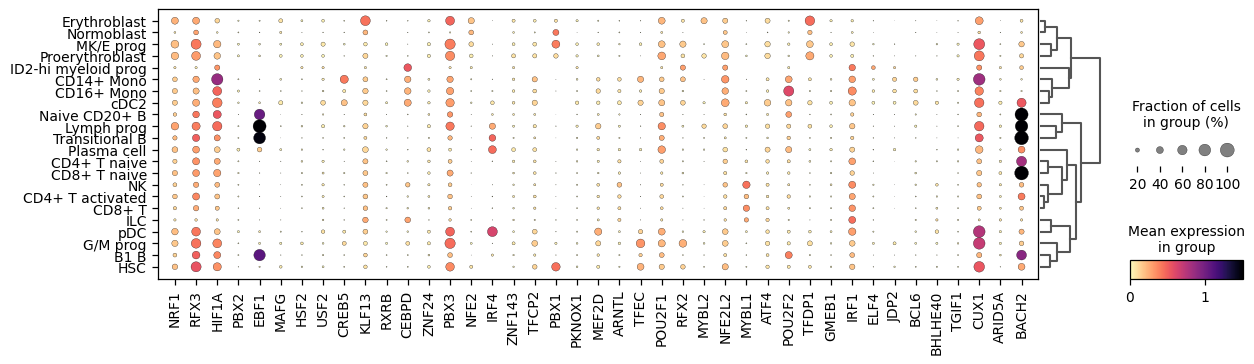

In [716]:
pl1 = sc.pl.dotplot(gex_adata, sorted_tfs, groupby='cell_type', 
              dendrogram=True, figsize=[14,3.5],
              vmax=1.5, cmap=palette_continuous_2, 
              show=False, return_fig=True, dot_max=1.0
             )
pl1.style(largest_dot=100, cmap=palette_continuous_2)
pl1.savefig('/home/jovyan/mount/gdrive/DGD_multiomics/plot_outputs/TF_dotplot.pdf')

- IRF1: Represses genes involved in anti-proliferative response, such as BIRC5/survivin, CCNB1, CCNE1, CDK1, CDK2 and CDK4 and in immune response, such as FOXP3, IL4, ANXA2 and TLR4 (PubMed:18641303, 22200613).
- ELF4/GMEB1: very low, unspecific expression
- TFDP1 ??


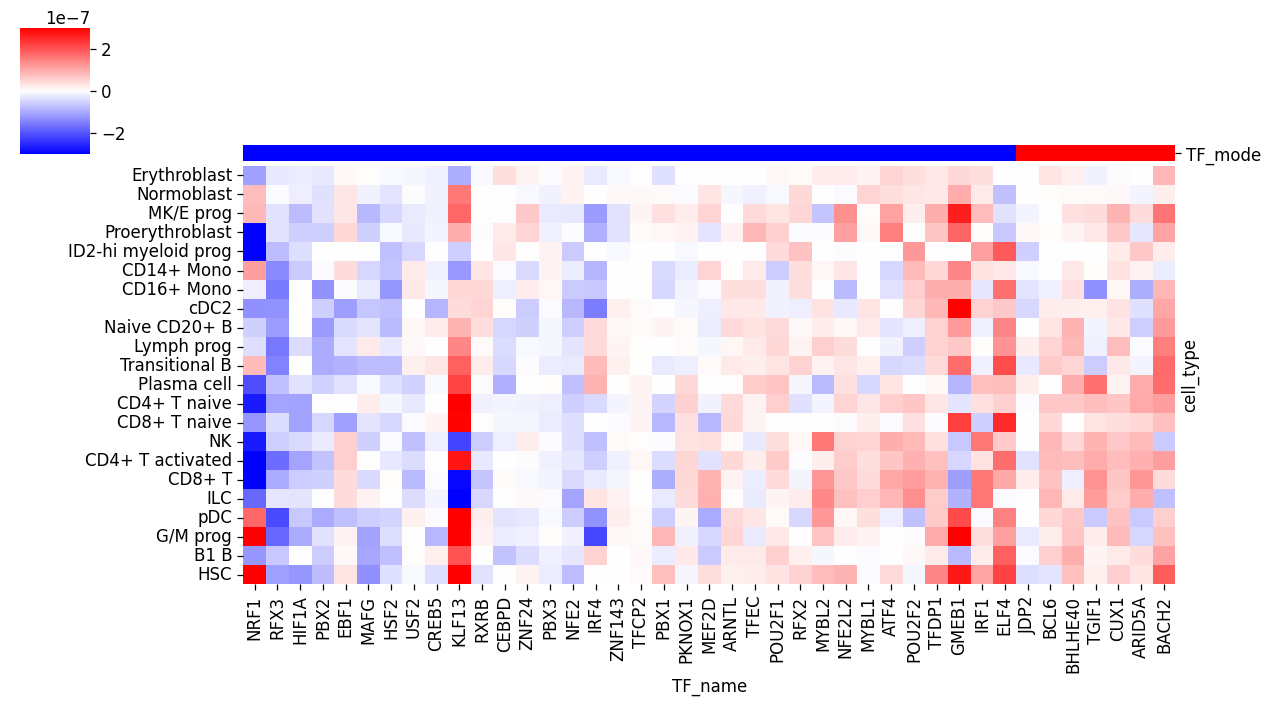

In [720]:
ax = pl1.get_axes()['mainplot_ax']
ordered_cts = [l.get_text() for l in ax.get_yticklabels()]

pl_df = long_perturb_df[(long_perturb_df['metric_type'] == 'mean_delta') & (long_perturb_df.peak_set == 'TF_binding')]
ct_res = pl_df.groupby(['TF_name', 'cell_type']).mean('value').reset_index().pivot(index=['TF_name'], values='value', columns=['cell_type'])
ct_res = ct_res.fillna(0)
ct_res = ct_res.loc[sorted_tfs, ordered_cts].copy()

palette_df = pl_df.sort_values('TF_mode')[['TF_name', 'TF_mode']].drop_duplicates()
palette_df['color'] = np.where(palette_df.TF_mode == 'Activator', 'blue','red')

# Create a color map for the categorical values
color_map = {'Activator': 'blue', 'Repressor': 'red'}

# Map the colors to the TF_mode values
row_colors = palette_df.set_index("TF_name")['TF_mode'].map(color_map)
row_colors

cluster = sns.clustermap(ct_res.T, cmap='bwr', 
               vmax=3e-07, vmin=-3e-07, 
               col_cluster=False, row_cluster=False,
               xticklabels=True, yticklabels=True,
               col_colors=row_colors, figsize=(14,7));
cluster.ax_heatmap.yaxis.tick_left()
plt.savefig('/home/jovyan/mount/gdrive/DGD_multiomics/plot_outputs/TF_ct_delta.pdf')

In [842]:
from scipy.stats import pearsonr
mean_df['abs_value'] = np.abs(mean_df.value)
mean_df['log_N_cells'] = np.log10(mean_df.N_cells)
r2, pval = pearsonr(mean_df[(mean_df.peak_set == 'TF_binding')]['N_cells'], mean_df[(mean_df.peak_set == 'TF_binding')]['abs_value'])

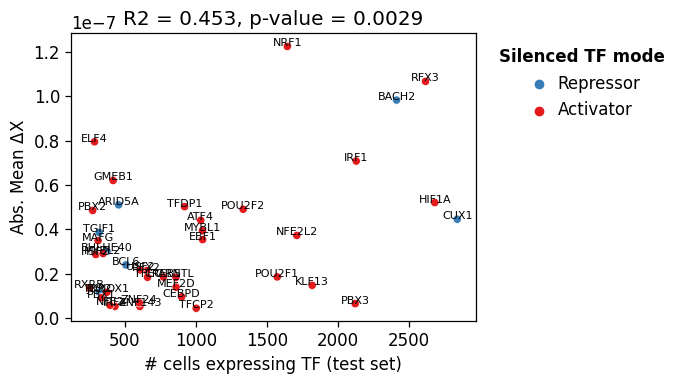

In [846]:
plt.rcParams['figure.figsize'] = [7,4]
sns.scatterplot(mean_df[mean_df.peak_set == 'TF_binding'], x='N_cells', y='abs_value', hue='TF_mode',
               palette=mode_palette);
# sns.scatterplot(mean_df[mean_df.peak_set == 'random'], x='log_N_cells', y='abs_value', color='grey');

# Add labels to specific data points
labels = mean_df[mean_df.peak_set == 'TF_binding']['TF_name']
points = mean_df[mean_df.peak_set == 'TF_binding'][['N_cells', 'abs_value']].values

for label, point in zip(labels, points):
    plt.text(point[0], point[1], label, fontsize=8, ha='center')
leg = plt.legend(bbox_to_anchor=(1.- legend_x_dist, 1.+legend_y_dist), 
                   loc='upper left', frameon=False, title='Silenced TF mode',
                   handletextpad=handletextpad)
leg.get_title().set_fontweight('bold');
plt.xlabel("# cells expressing TF (test set)");
plt.ylabel("Abs. Mean $\Delta$X".format());
plt.title(f'R2 = {np.round(r2, 3)}, p-value = {np.round(pval, 4)}')
plt.tight_layout();
plt.savefig('/home/jovyan/mount/gdrive/DGD_multiomics/plot_outputs/TF_delta_vs_ncells.pdf')


In [721]:
from scipy.stats import ttest_ind
test_df = long_perturb_df[(long_perturb_df['metric_type'] == 'frac_closing') & (long_perturb_df['peak_set'] == 'TF_binding')]
# test_df = long_perturb_df[(long_perturb_df['metric_type'] == 'frac_closing')]
pval = ttest_ind(test_df[test_df['TF_mode'] == 'Activator'].value, test_df[test_df['TF_mode'] == 'Repressor'].value).pvalue
# test_df = test_df.groupby(['TF_name', 'TF_mode', 'peak_set'])['value'].mean().reset_index()

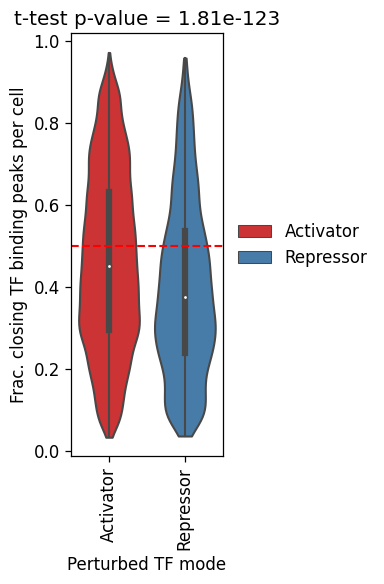

In [745]:
with plt.rc_context({"figure.figsize":[4,6]}):
#     sns.set_context("poster")
    sns.violinplot(data=test_df, 
                x='TF_mode', y='value', hue="TF_mode", dodge=False, 
#                 scale='width', 
                   cut=0, 
                palette=mode_palette);
    plt.xticks(rotation=90, ha='center', va='top');
    plt.ylabel('Frac. closing TF binding peaks per cell');
    plt.xlabel('Perturbed TF mode');
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False);
    plt.axhline(0.5, color='red', linestyle='--')
    plt.title(f"t-test p-value = {'{:.2e}'.format(pval)}")

plt.tight_layout()
plt.savefig('/home/jovyan/mount/gdrive/DGD_multiomics/plot_outputs/TF_frac_opening.pdf');

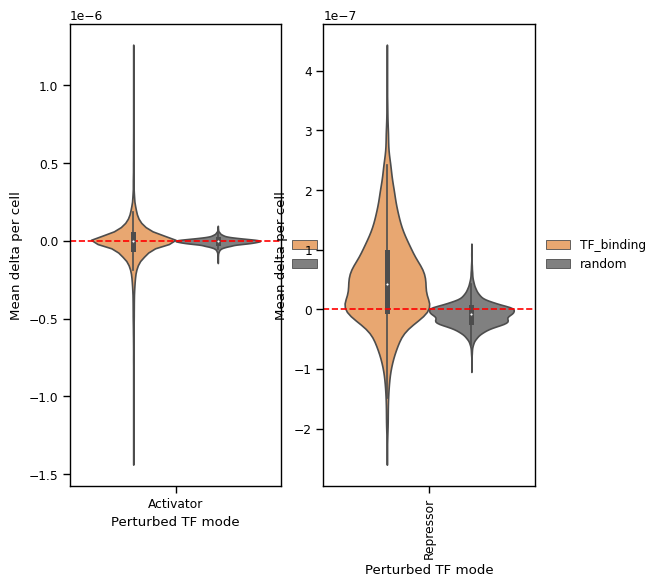

In [1079]:
with plt.rc_context({"figure.figsize":[6,6]}):
    test_df = long_perturb_df[(long_perturb_df['metric_type'] == 'mean_delta')]
    test_df = test_df[test_df['N_cells'] > 200]
    test_df = test_df[test_df['N_peaks'] <  motifs_in_peaks_clean.shape[0]*0.8]
    # test_df = test_df[test_df['TF_name'] !='NRF1']
    plt.subplot(1,2,1 );
    sns.violinplot(data=test_df[test_df.TF_mode == 'Activator'], 
                x='TF_mode', y='value', hue='peak_set', scale='width',  cut=0, 
                   palette=[sns.color_palette("Spectral")[1], 'grey']);

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False);
    plt.axhline(0, color='red', linestyle='--')
    plt.ylabel('Mean delta per cell');
    plt.xlabel('Perturbed TF mode');
    plt.subplot(1,2, 2);
    sns.violinplot(data=test_df[test_df.TF_mode == 'Repressor'], 
                x='TF_mode', y='value', hue='peak_set', scale='width',  cut=0, 
                   palette=[sns.color_palette("Spectral")[1], 'grey']);
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False);
    plt.axhline(0, color='red', linestyle='--')
    plt.ylabel('Mean delta per cell');
    plt.xlabel('Perturbed TF mode');
    plt.xticks(rotation=90, ha='center', va='top');

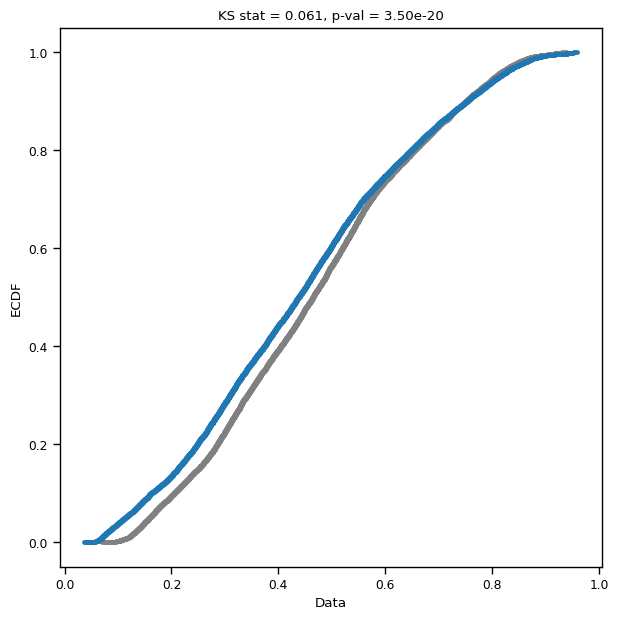

In [1082]:
from scipy.stats import ttest_ind, ks_2samp
test_df = long_perturb_df[(long_perturb_df['metric_type'] == 'frac_closing') & (long_perturb_df['TF_mode'] == 'Repressor')]
# test_df = test_df[test_df['N_peaks'] <  motifs_in_peaks_clean.shape[0]*0.8]
ks_test_res = ks_2samp(test_df[test_df['peak_set'] == 'TF_binding'].value, test_df[test_df['peak_set'] == 'random'].value)

plt.rcParams['figure.figsize'] = [7,7]
plot_ecdf(test_df[test_df.peak_set == 'random']['value'], color='grey');
plot_ecdf(test_df[test_df.peak_set == 'TF_binding']['value']);
plt.title(f"KS stat = {np.round(ks_test_res.statistic * ks_test_res.statistic_sign, 3)}, p-val = {'{:.2e}'.format(ks_test_res.pvalue)}");

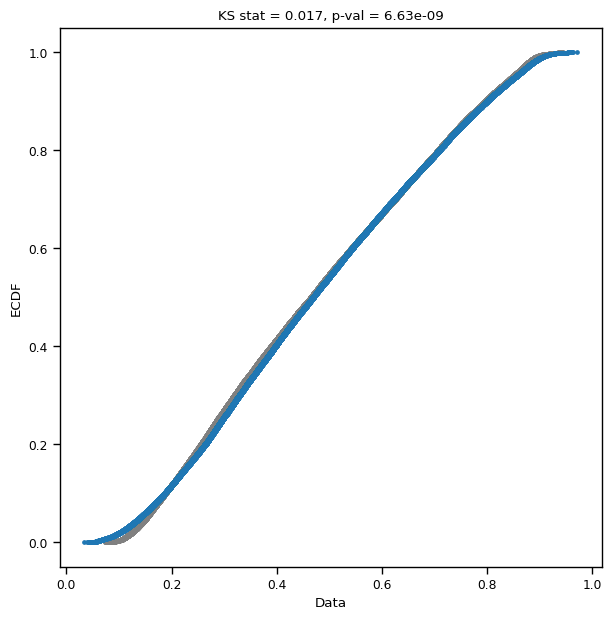

In [1083]:
from scipy.stats import ttest_ind, ks_2samp
test_df = long_perturb_df[(long_perturb_df['metric_type'] == 'frac_closing') & (long_perturb_df['TF_mode'] == 'Activator')]
# test_df = test_df[test_df['N_cells'] > 200]
# test_df = test_df[test_df['N_peaks'] <  motifs_in_peaks_clean.shape[0]*0.8]
# test_df = test_df[test_df['TF_name'] !='NRF1']
ks_test_res = ks_2samp(test_df[test_df['peak_set'] == 'TF_binding'].value, test_df[test_df['peak_set'] == 'random'].value)

plt.rcParams['figure.figsize'] = [7,7]
plot_ecdf(test_df[test_df.peak_set == 'random']['value'], color='grey');
plot_ecdf(test_df[test_df.peak_set == 'TF_binding']['value']);
plt.title(f"KS stat = {np.round(ks_test_res.statistic * ks_test_res.statistic_sign, 3)}, p-val = {'{:.2e}'.format(ks_test_res.pvalue)}");

In [415]:
# import scanpy as sc
# sc.pl.heatmap(atac_delta_adata, var_names = random_peaks, groupby='cell_type', vmax=3e-05, vmin=-3e-05, cmap='bwr')
# sc.pl.heatmap(atac_delta_adata, var_names = TF_binding_peaks, groupby='cell_type', vmax=3e-05, vmin=-3e-05, cmap='bwr')

## Effect at promoters

Get genes to perturb - highly variable genes

In [108]:
import scanpy as sc

gex_adata = testset[:,testset.var['feature_types'] == 'GEX'].copy()
sc.pp.normalize_total(gex_adata)
sc.pp.log1p(gex_adata)
sc.pp.highly_variable_genes(gex_adata)

In [127]:
promoter_genes_perturb = [x for x in gex_adata.var_names[gex_adata.var['highly_variable']].tolist() 
     if not x.endswith(".1") and not x.startswith("MT-") and not x.startswith("HIST")]

In [122]:
# Get positions of genes
ensdb = gf.ensembl.annotation(species="Hsapiens", version="108")
gene_ranges_df = ensdb.genes()
try:
    gene_ranges_df = gene_ranges_df[gene_ranges_df['gene_id'].isin(var_gex.gene_id)].copy()
    gene_ranges_df = gene_ranges_df.set_index("gene_id")
except KeyError:
    gene_ranges_df = gene_ranges_df.set_index("gene_name")

In [133]:
promoter_genes_perturb = [x for x in promoter_genes_perturb if x in gene_ranges_df.gene_name.tolist()]

In [135]:
with open('/nfs/team205/ed6/data/bonemarrow_model/genes_to_test.txt', 'w') as f:
    for g in promoter_genes_perturb:
        f.write(g + '\n')

Run analysis

Parse results

In [848]:
outfiles = [model_dir + x for x in os.listdir(model_dir) if x.startswith('TSS_')]
tss_res_df = pd.concat([pd.read_csv(f) for f in outfiles])
# n_peaks_per_gene = tss_res_df.perturbed_gene.value_counts()
# tss_res_df = tss_res_df[tss_res_df.perturbed_gene.isin(n_peaks_per_gene.index[n_peaks_per_gene > 2])]

In [849]:
n_genes = tss_res_df.perturbed_gene.nunique()

In [850]:
n_genes

1187

In [754]:
from scipy.stats import t

w_size = 100
# rollmean_df = tss_res_df.sort_values('distance').groupby('perturbed_gene').rolling(window=5, on='distance', closed='right').mean('mean_delta').reset_index()
rollmean_df = tss_res_df.sort_values('distance').rolling(window=w_size, on='distance', closed='left').median('mean_delta').reset_index()
rollmean_df = rollmean_df.dropna()
rollsd_df = tss_res_df.sort_values('distance').rolling(window=w_size, on='distance', closed='left')['mean_delta'].apply(lambda x: x.sem()).reset_index()
rollsd_df = rollsd_df.dropna()

# Calculate degrees of freedom (n-1) for t-distribution
degrees_of_freedom = w_size - 1

# Calculate confidence interval based on rolling mean and standard error
confidence_interval = rollsd_df['mean_delta'] * t.ppf(0.95, degrees_of_freedom)

rollmean_df['distance'] = pd.to_numeric(rollmean_df['distance'])
rollmean_df['mean_delta'] = pd.to_numeric(rollmean_df['mean_delta'])
rollsd_df['mean_delta'] = pd.to_numeric(rollsd_df['mean_delta'])

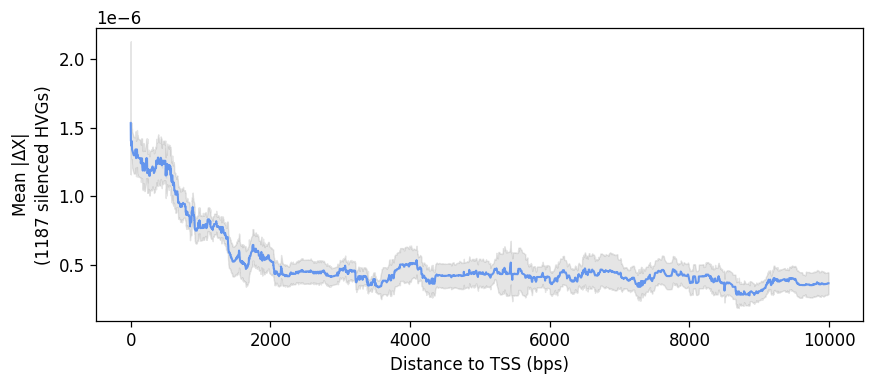

In [756]:
plt.rcParams['figure.figsize'] = [9,4]
sns.lineplot(data=rollmean_df, x='distance', y='mean_delta', color=palette_2colrs[1], linewidth=1.5)
plt.fill_between(rollmean_df['distance'], rollmean_df['mean_delta'] - rollsd_df['mean_delta'], rollmean_df['mean_delta'] + rollsd_df['mean_delta'], alpha=0.2, color='grey')
ax_list[-1].legend(bbox_to_anchor=(1.+legend_x_dist, 1.+legend_y_dist), 
                   loc='upper left', frameon=False,
                   handletextpad=handletextpad);
plt.xlabel("Distance to TSS (bps)");
# plt.text(8000, 1.6e-6, s=f'{n_genes} HVGs');
plt.ylabel("Mean |$\Delta$X|\n({n_genes} silenced HVGs)".format(n_genes = n_genes));
plt.tight_layout()
plt.savefig("/home/jovyan/mount/gdrive/DGD_multiomics/plot_outputs/TSS_signal.pdf");

In [ ]:
predicted_changes, samples_of_interest = model.gene2peak(gene_name='ZBTB7A', testset=testset)
delta_gex = predicted_changes[0]
delta_atac = predicted_changes[1]

atac_delta_adata = ad.AnnData(X = delta_atac.numpy(), obs = testset[samples_of_interest].obs, var=var_atac)

In [107]:
np.abs(atac_delta_adata[:,0:10].X)

ArrayView(1.1054835e-06, dtype=float32)

In [464]:
atac_delta_adata.obs['cell_type'].value_counts()

cell_type
CD14+ Mono             267
CD8+ T                 209
Erythroblast           198
NK                     124
Proerythroblast         85
CD4+ T activated        80
CD16+ Mono              75
CD4+ T naive            70
Normoblast              46
Naive CD20+ B           42
cDC2                    30
G/M prog                30
B1 B                    20
MK/E prog               20
Transitional B          19
pDC                     16
Lymph prog              16
HSC                     14
CD8+ T naive            12
ILC                     12
Plasma cell              6
ID2-hi myeloid prog      1
Name: count, dtype: int64